**Usando entorno MNE**

In [3]:

import numpy as np
import mne

sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = (sample_data_folder / "MEG" / "sample" / "sample_audvis_filt-0-40_raw.fif")
raw = mne.io.read_raw_fif(sample_data_raw_file)

Opening raw data file C:\Users\GUILLERMO\mne_data\MNE-sample-data\MEG\sample\sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.


In [8]:
print(raw)
print(raw.info)

<Raw | sample_audvis_filt-0-40_raw.fif, 376 x 41700 (277.7 s), ~3.2 MB, data not loaded>
<Info | 14 non-empty values
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off, Average EEG reference: off
 sfreq: 150.2 Hz
>


Effective window size : 13.639 (s)
Plotting power spectral density (dB=True).


d:\Hiroshi\Otros\Otros\Pal_paiton\envs\mne\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


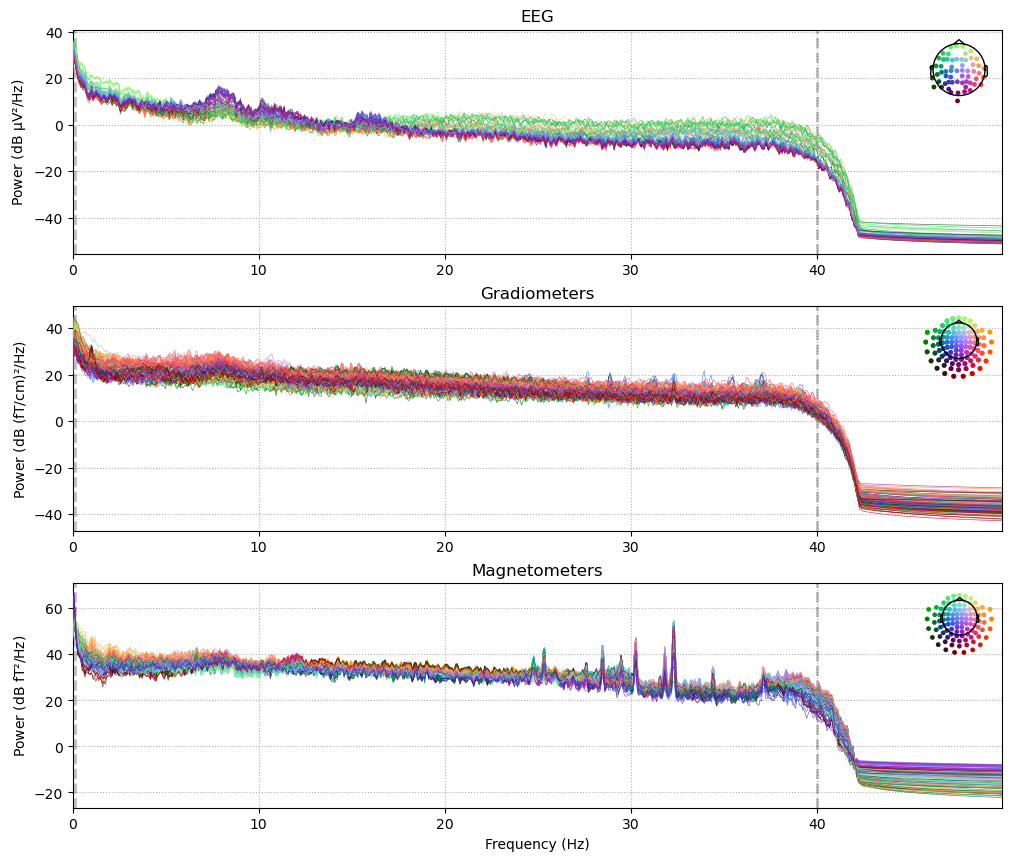

Channels marked as bad:
['MEG 2443', 'EEG 053']


In [12]:
#raw.compute_psd(fmax=50).plot(picks="data",exclude="bads",amplitude=False)


In [14]:
#raw.plot(duration=5, n_channels=30)

Waiting for Loading-Thread to finish... (max. 10 sec)
Channels marked as bad:
['MEG 2443', 'EEG 053']


Fitting ICA to data using 364 channels (please be patient, this may take a while)


Selecting by number: 20 components
Fitting ICA took 3.7s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
138 matching events found
No baseline correction applied
0 projection items activated


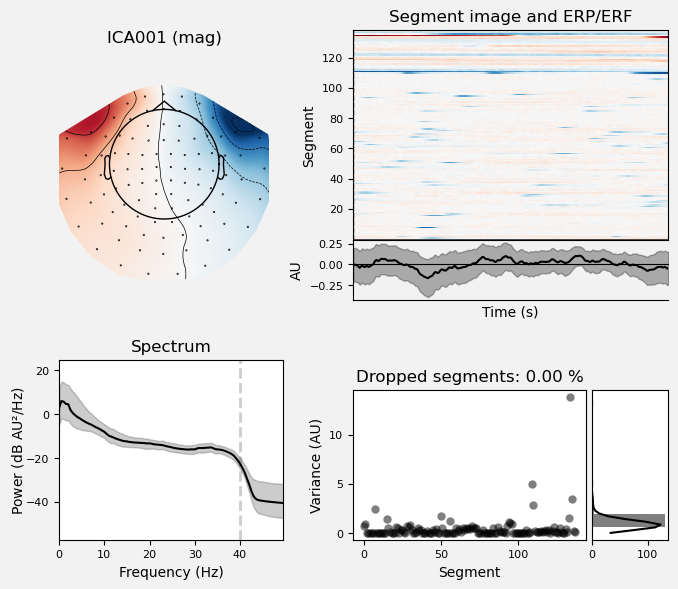

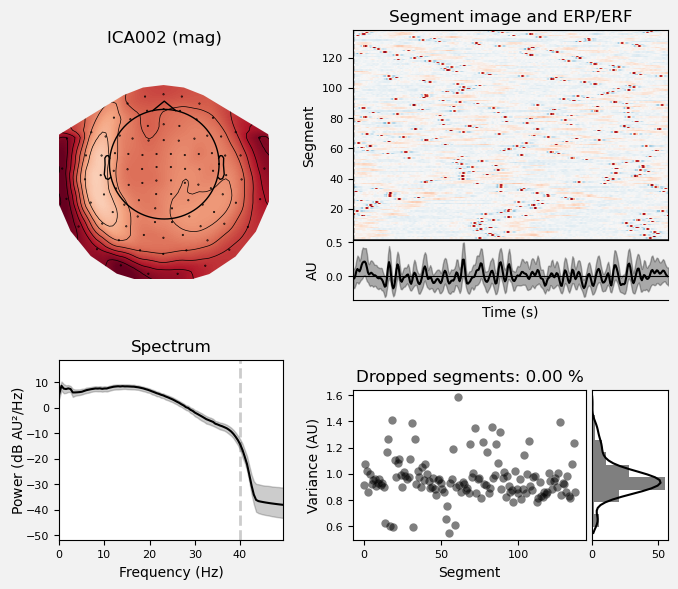

[<Figure size 700x600 with 6 Axes>, <Figure size 700x600 with 6 Axes>]

In [18]:
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter =800)
ica.fit(raw)
ica.exclude = [1,2]
ica.plot_properties(raw, picks=ica.exclude)


In [19]:
orig_raw = raw.copy()
raw.load_data()
ica.apply(raw)
chs = [
    "MEG 0111",
    "MEG 0121",
    "MEG 0131",
    "MEG 0211",
    "MEG 0221",
    "MEG 0231",
    "MEG 0311",
    "MEG 0321",
    "MEG 0331",
    "MEG 1511",
    "MEG 1521",
    "MEG 1531",
    "EEG 001",
    "EEG 002",
    "EEG 003",
    "EEG 004",
    "EEG 005",
    "EEG 006",
    "EEG 007",
    "EEG 008",
]
chan_idxs = [raw.ch_names.index(ch) for ch in chs]
orig_raw.plot(order=chan_idxs, start=12, duration = 4)
raw.plot(order=chan_idxs, start=12, duration=4)

Reading 0 ... 41699  =      0.000 ...   277.709 secs...
Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 2 ICA components
    Projecting back using 364 PCA components


Channels marked as bad:
['MEG 2443', 'EEG 053']
Channels marked as bad:
['MEG 2443', 'EEG 053']
